In [121]:
import pandas as pd
import os

# List of all the CSV file names (no need to use glob in this case)
csv_files = [
    'CSK_Players_List.csv', 'DC_Players_List.csv', 'GT_Players_List.csv',
    'KKR_Players_List.csv', 'LSG_Players_List.csv', 'MI_Players_List.csv',
    'PBKS_Players_List.csv', 'RCB_Players_List.csv', 'RR_Players_List.csv',
    'SRH_Players_List.csv'
]

# List to hold individual dataframes
dataframes = []

# Loop through the CSV files and read them into dataframes
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Add a new column for the CSV file name (without the path)
    df['file_name'] = os.path.basename(file)
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
ipl = pd.concat(dataframes, ignore_index=True)

# Display the combined dataframe
print(ipl)


     Sr. No.                Player  Base Price  Winning Bid Capped/Uncapped  \
0          1            Noor Ahmad    20000000    100000000          Capped   
1          2  Ravichandaran Ashwin    20000000     97500000          Capped   
2          3          Devon Conway    20000000     62500000          Capped   
3          4    Syed Khaleel Ahmed    20000000     48000000          Capped   
4          5       Rachin Ravindra    15000000     40000000          Capped   
..       ...                   ...         ...          ...             ...   
177       11       Kamindu Mendis     75000000     75000000          Capped   
178       12        Zeeshan Ansari    30000000     40000000        Uncapped   
179       13           Sachin Baby    30000000     30000000        Uncapped   
180       14          Aniket Verma    30000000     30000000        Uncapped   
181       15         Atharva Taide    30000000     30000000        Uncapped   

                file_name  
0    CSK_Players_List.c

# DATA PREPROCESSING

In [123]:
ipl.sample(5)

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped,file_name
127,17,Xavier Bartlett,7500000,8000000,Capped,PBKS_Players_List.csv
47,9,R. Sai Kishore,7500000,20000000,Capped,GT_Players_List.csv
53,15,Ishant Sharma,7500000,7500000,Capped,GT_Players_List.csv
145,12,Nuwan Thushara,75000000,160000000,Capped,RCB_Players_List.csv
124,14,Harpreet Brar,3000000,15000000,Uncapped,PBKS_Players_List.csv


In [124]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sr. No.          182 non-null    int64 
 1   Player           182 non-null    object
 2   Base Price       182 non-null    int64 
 3   Winning Bid      182 non-null    int64 
 4   Capped/Uncapped  182 non-null    object
 5   file_name        182 non-null    object
dtypes: int64(3), object(3)
memory usage: 8.7+ KB


In [125]:
ipl.shape

(182, 6)

In [126]:
ipl.isnull().sum()

Sr. No.            0
Player             0
Base Price         0
Winning Bid        0
Capped/Uncapped    0
file_name          0
dtype: int64

In [127]:
ipl.duplicated().sum()

0

# EDA

In [129]:
ipl.columns

Index(['Sr. No.', 'Player', 'Base Price', 'Winning Bid', 'Capped/Uncapped',
       'file_name'],
      dtype='object')

In [130]:
ipl=ipl.rename(columns={ 'file_name':'team_name'})

In [131]:
ipl.sample(8)

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped,team_name
28,9,Faf Du Plessis,20000000,20000000,Capped,DC_Players_List.csv
124,14,Harpreet Brar,3000000,15000000,Uncapped,PBKS_Players_List.csv
68,10,Rovman Powell,15000000,15000000,Capped,KKR_Players_List.csv
34,15,Madhav Tiwari,3000000,4000000,Uncapped,DC_Players_List.csv
73,15,Mayank Markande,3000000,3000000,Uncapped,KKR_Players_List.csv
106,14,Bevan John Jacobs,3000000,3000000,Uncapped,MI_Players_List.csv
6,7,Rahul Tripathi,7500000,34000000,Capped,CSK_Players_List.csv
80,7,Shahbaz Ahamad,10000000,24000000,Capped,LSG_Players_List.csv


In [132]:
ipl['team_name'] = ipl['team_name'].str.replace("_List.csv", "", regex=False)

In [133]:
ipl.sample(5)

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped,team_name
4,5,Rachin Ravindra,15000000,40000000,Capped,CSK_Players
30,11,Donovan Ferreira,7500000,7500000,Capped,DC_Players
160,8,Akash Madhwal,30000000,120000000,Uncapped,RR_Players
141,8,Tim David,200000000,300000000,Capped,RCB_Players
148,15,Swapnil Singh,30000000,50000000,Uncapped,RCB_Players


In [134]:
ipl.columns

Index(['Sr. No.', 'Player', 'Base Price', 'Winning Bid', 'Capped/Uncapped',
       'team_name'],
      dtype='object')

In [135]:
ipl.describe()

,Sr. No.,Base Price,Winning Bid
count,182.000000,1.820000e+02,1.820000e+02
mean,9.791209,3.390385e+07,1.180714e+08
std,5.577216,5.596351e+07,2.463418e+08
min,1.000000,3.000000e+06,3.000000e+06
25%,5.000000,3.000000e+06,7.500000e+06
50%,10.000000,1.500000e+07,2.700000e+07
75%,14.000000,3.000000e+07,1.000000e+08
max,23.000000,2.000000e+08,1.250000e+09


In [136]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sr. No.          182 non-null    int64 
 1   Player           182 non-null    object
 2   Base Price       182 non-null    int64 
 3   Winning Bid      182 non-null    int64 
 4   Capped/Uncapped  182 non-null    object
 5   team_name        182 non-null    object
dtypes: int64(3), object(3)
memory usage: 8.7+ KB


In [137]:
ipl['Base Price'] = ipl['Base Price'].astype(int)
ipl['Winning Bid'] = ipl['Winning Bid'].astype(int)


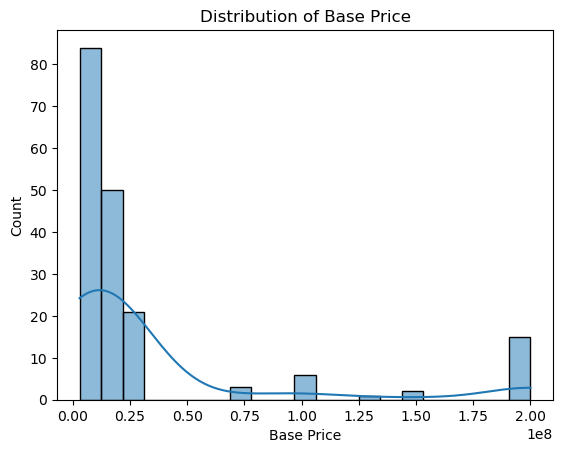

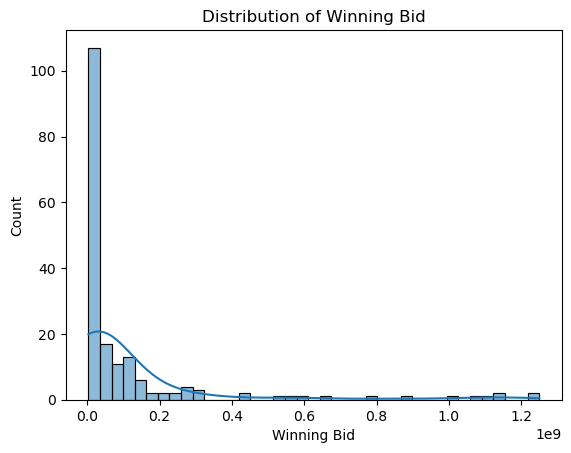

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['Base Price', 'Winning Bid']:
    sns.histplot(ipl[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


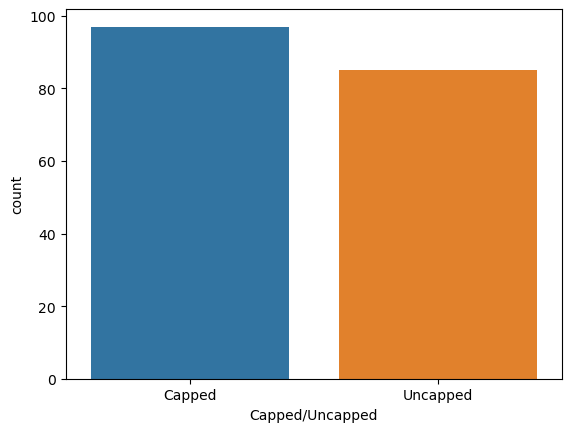

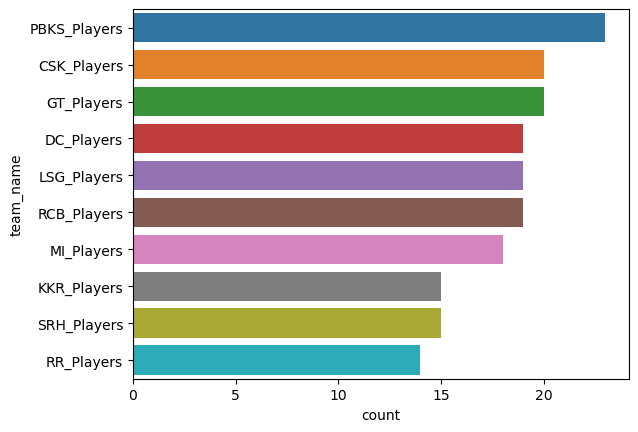

In [139]:
sns.countplot(data=ipl, x='Capped/Uncapped')
plt.show()

sns.countplot(data=ipl, y='team_name', order=ipl['team_name'].value_counts().index)
plt.show()


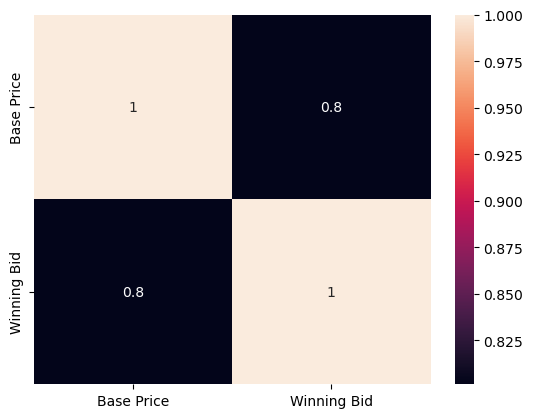

In [140]:
sns.heatmap(ipl[['Base Price', 'Winning Bid']].corr(), annot=True)
plt.show()


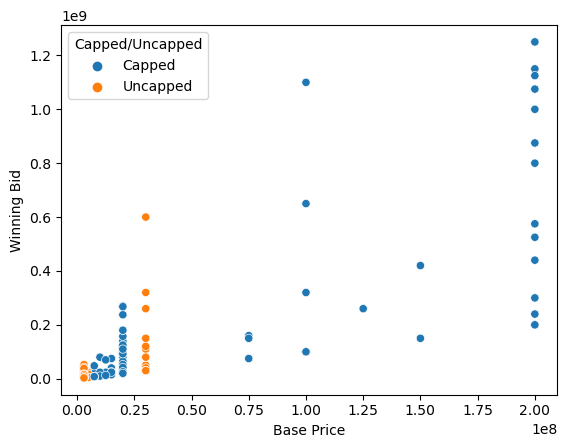

In [141]:
sns.scatterplot(data=ipl, x='Base Price', y='Winning Bid', hue='Capped/Uncapped')
plt.show()


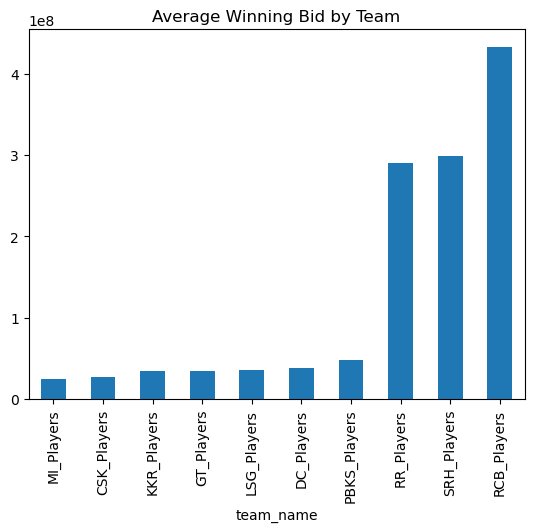

In [142]:
team_avg_bid = ipl.groupby('team_name')['Winning Bid'].mean().sort_values()
team_avg_bid.plot(kind='bar', title='Average Winning Bid by Team')
plt.show()


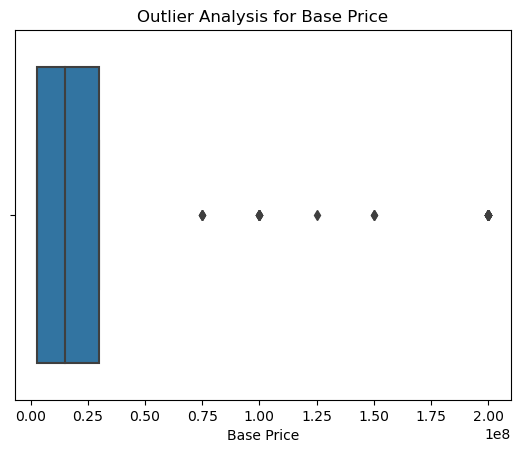

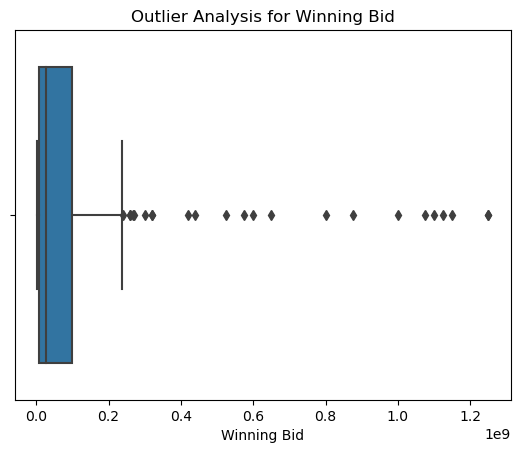

In [143]:
for col in ['Base Price', 'Winning Bid']:
    sns.boxplot(data=ipl, x=col)
    plt.title(f'Outlier Analysis for {col}')
    plt.show()


In [144]:
# Define limits using the IQR method
for col in ['Base Price', 'Winning Bid']:
    Q1 = ipl[col].quantile(0.25)
    Q3 = ipl[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap outliers
    ipl[col] = ipl[col].clip(lower=lower_limit, upper=upper_limit)


In [145]:
# Remove rows with outliers
for col in ['Base Price', 'Winning Bid']:
    Q1 = ipl[col].quantile(0.25)
    Q3 = ipl[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    ipl = ipl[(ipl[col] >= lower_limit) & (ipl[col] <= upper_limit)]


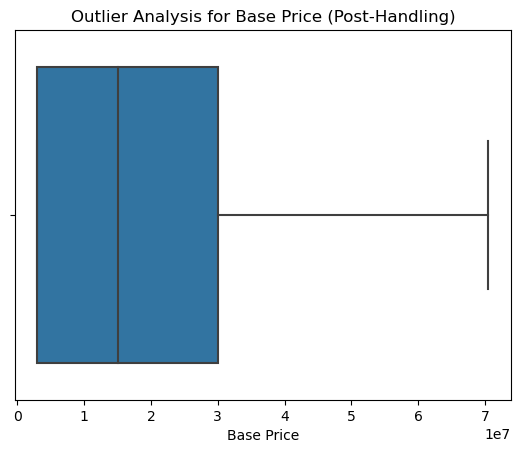

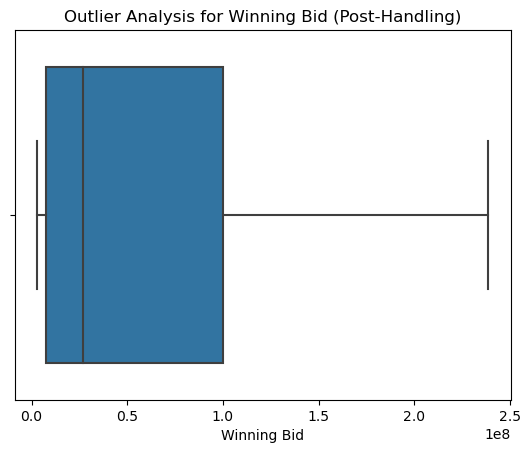

In [146]:
for col in ['Base Price', 'Winning Bid']:
    sns.boxplot(data=ipl, x=col)
    plt.title(f'Outlier Analysis for {col} (Post-Handling)')
    plt.show()


In [147]:
ipl['Bid-to-Base Ratio'] = ipl['Winning Bid'] / ipl['Base Price']


In [148]:
ipl.sample(5)

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped,team_name,Bid-to-Base Ratio
127,17,Xavier Bartlett,7500000,8000000,Capped,PBKS_Players,1.066667
150,17,Abhinandan Singh,30000000,30000000,Uncapped,RCB_Players,1.000000
6,7,Rahul Tripathi,7500000,34000000,Capped,CSK_Players,4.533333
152,19,Manoj Bhandage,30000000,30000000,Uncapped,RCB_Players,1.000000
76,3,Akash Deep,10000000,80000000,Capped,LSG_Players,8.000000


# MODEL

In [149]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Step 3: Preprocessing the data

# Encode categorical features (e.g., Capped/Uncapped and team_name)
# We will use OneHotEncoder for categorical features like 'team_name' and label encoding for 'Capped/Uncapped'
ipl['Capped/Uncapped'] = ipl['Capped/Uncapped'].map({'Capped': 1, 'Uncapped': 0})

# Selecting features (X) and target variable (y)
X = ipl.drop(columns=['Player', 'Sr. No.'])  # Drop 'Player' and 'Sr. No.' as they are not numerical
y = ipl['Winning Bid']  # Assuming 'Winning Bid' is the target

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scaling the features
# We'll use StandardScaler to scale the numerical features
# Create a column transformer that scales the numerical features and applies OneHotEncoding to categorical ones
numerical_features = ['Base Price', 'Bid-to-Base Ratio']
categorical_features = [col for col in X.columns if 'team_name' in col]

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Step 6: Build the model pipeline
# Create a pipeline that first processes the data and then fits the Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 7: Fit the model
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 64000144256756.76
R-squared: 0.9891238632185756


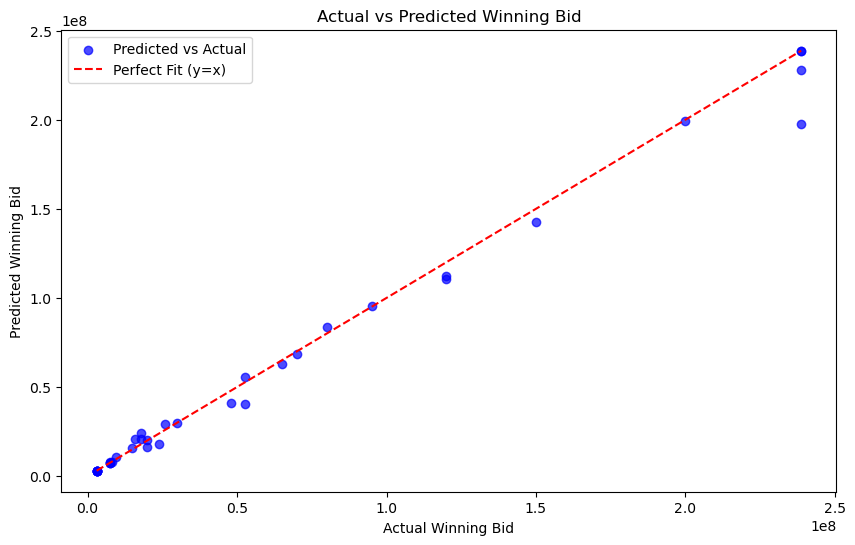

In [150]:
import matplotlib.pyplot as plt

# Step 1: Predict on the test data
y_pred = model.predict(X_test)

# Step 2: Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit (y=x)')
plt.xlabel('Actual Winning Bid')
plt.ylabel('Predicted Winning Bid')
plt.title('Actual vs Predicted Winning Bid')
plt.legend()
plt.show()


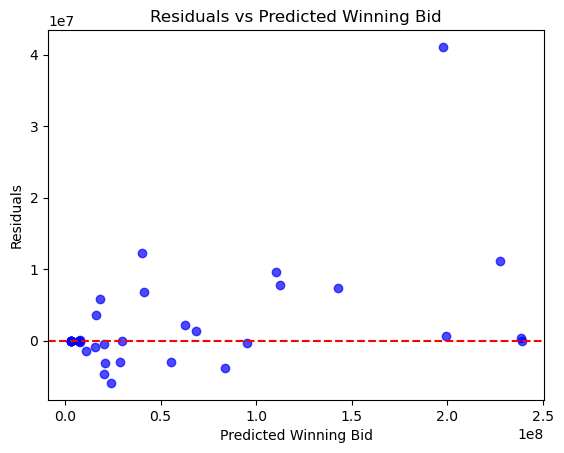

In [151]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Winning Bid')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Winning Bid')
plt.show()


In [153]:
ipl.columns

Index(['Sr. No.', 'Player', 'Base Price', 'Winning Bid', 'Capped/Uncapped',
       'team_name', 'Bid-to-Base Ratio'],
      dtype='object')

In [154]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr. No.            182 non-null    int64  
 1   Player             182 non-null    object 
 2   Base Price         182 non-null    int32  
 3   Winning Bid        182 non-null    int32  
 4   Capped/Uncapped    182 non-null    int64  
 5   team_name          182 non-null    object 
 6   Bid-to-Base Ratio  182 non-null    float64
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 8.7+ KB


In [156]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd

# Load your dataset (assuming it is already in a DataFrame called 'ipl')
# Example: ipl = pd.read_csv("path_to_your_data.csv")

# Define the features
numerical_features = ['Base Price', 'Bid-to-Base Ratio']
categorical_features = ['team_name']

# Define the preprocessor for scaling and encoding with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessor and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Define the feature matrix (X) and target variable (y)
X = ipl[['Base Price', 'Bid-to-Base Ratio', 'team_name']]
y = ipl['Winning Bid']

# Train the model
model_pipeline.fit(X, y)

# Save the trained model pipeline
joblib.dump(model_pipeline, 'ipl_model_pipeline.pkl')


['ipl_model_pipeline.pkl']

In [158]:
import joblib
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Load your dataset (assuming you have it in a dataframe called 'ipl')
# Example: ipl = pd.read_csv("path_to_your_data.csv")

# Define the features
numerical_features = ['Base Price', 'Bid-to-Base Ratio']
categorical_features = ['team_name']

# Define the preprocessor for scaling and encoding with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessor and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Define the feature matrix (X) and target variable (y)
X = ipl[['Base Price', 'Bid-to-Base Ratio', 'team_name']]
y = ipl['Winning Bid']

# Train the model
model_pipeline.fit(X, y)

# Save the trained model pipeline
joblib.dump(model_pipeline, 'ipl_model_pipeline.pkl')


['ipl_model_pipeline.pkl']